Output Speed: 50.000000000000014


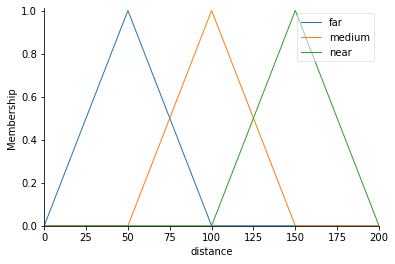

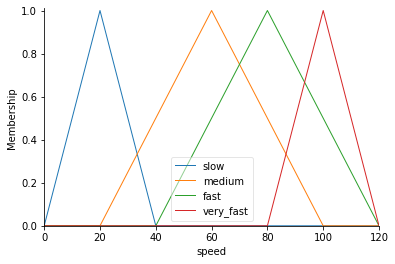

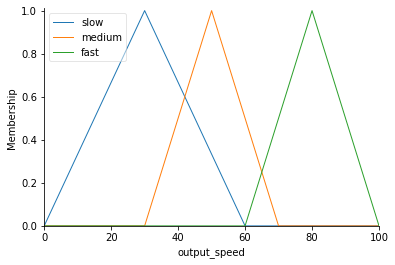

In [1]:
import warnings
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Disable warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Input variables
distance = ctrl.Antecedent(np.arange(0, 201, 1), 'distance')  # Distance (0-200 meters)
speed = ctrl.Antecedent(np.arange(0, 121, 1), 'speed')  # Speed (0-120 km/h)

# Output variable
output_speed = ctrl.Consequent(np.arange(0, 101, 1), 'output_speed')  # Output Speed (0-100 km/h)

# Distance sets
distance['far'] = fuzz.trimf(distance.universe, [0, 50, 100])
distance['medium'] = fuzz.trimf(distance.universe, [50, 100, 150])
distance['near'] = fuzz.trimf(distance.universe, [100, 150, 200])

# Speed sets
speed['slow'] = fuzz.trimf(speed.universe, [0, 20, 40])
speed['medium'] = fuzz.trimf(speed.universe, [20, 60, 100])
speed['fast'] = fuzz.trimf(speed.universe, [40, 80, 120])
speed['very_fast'] = fuzz.trimf(speed.universe, [80, 100, 120])

# Output Speed sets
output_speed['slow'] = fuzz.trimf(output_speed.universe, [0, 30, 60])
output_speed['medium'] = fuzz.trimf(output_speed.universe, [30, 50, 70])
output_speed['fast'] = fuzz.trimf(output_speed.universe, [60, 80, 100])

# Rules
rule1 = ctrl.Rule(distance['far'] & speed['slow'], output_speed['slow'])
rule2 = ctrl.Rule(distance['medium'], output_speed['medium'])
rule3 = ctrl.Rule(distance['near'] & speed['slow'], output_speed['slow'])
rule4 = ctrl.Rule(distance['near'] & speed['fast'], output_speed['medium'])

# Control system
speed_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
speed_simulation = ctrl.ControlSystemSimulation(speed_control_system)

# Assign input values
speed_simulation.input['distance'] = 120  # Example distance: 120 meters
speed_simulation.input['speed'] = 90  # Example speed: 90 km/h

# Perform inference
speed_simulation.compute()

# Get output value
output = speed_simulation.output['output_speed']
print("Output Speed:", output)

# Plot graphs
distance.view()
speed.view()
output_speed.view()
